Desafio: Comparar municípios para estabelecer metas de redução de óbito e acidentes em estradas em 2017. Utilização de algoritmos de análise de agrupamento para obter grupos de municípios comparáveis.

1) Analisar as variáveis para definir os agrupamentos
2) Listar variáveis relevantes e irrelevantes determinando um subconjunto adequado para aplicar o algoritmo
3) Selecionar e ajustar um modelo de análise de cluster
4) Validar o ajuste do modelo utilizando métricas de qualidade
5) Apresentar os resultados para equipe de negócio

Observação: existem variáveis que são dependentes de outras

In [584]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf 
from plotly import __version__
import missingno as msno 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.figure_factory as ff
cf.go_offline()
init_notebook_mode(connected=True)

# Leitura dos Dados

In [733]:
df = pd.read_csv('C:\\Users\\tcortizo\\Documents\\Desafio Pleno\\city_dataset.csv', sep=';', low_memory=False)

df.columns

Index(['cidade', 'ibge', 'pib', 'mat1517', 'veiculos', 'motos', 'populacao',
       'pop1519', 'pop2024', 'pop2529', 'pop60p', 'jovem', 'rodovia'],
      dtype='object')

In [734]:
df.head()

cidade     ibge     pib  mat1517  veiculos  motos  populacao  \
0        Adamantina  3500105  753020       95     22266   5415      33843   
1            Adolfo  3500204   67123       81      1737    315       3524   
2             Aguaí  3500303  619843       57     16229   4558      33181   
3    Águas da Prata  3500402  104041       45      3724    765       7651   
4  Águas de Lindóia  3500501  299599       60     10242   2946      17610   

   pop1519  pop2024  pop2529  pop60p  jovem  rodovia  
0     2390     2676     2617      19   7683     23.0  
1      255      272      269      17    796      4.0  
2     2764     2937     3021      13   8723     63.0  
3      544      601      586      19   1732     27.0  
4     1324     1341     1413      16   4077      7.0

In [735]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 13 columns):
cidade       645 non-null object
ibge         645 non-null int64
pib          645 non-null int64
mat1517      645 non-null int64
veiculos     645 non-null int64
motos        645 non-null int64
populacao    645 non-null int64
pop1519      645 non-null int64
pop2024      645 non-null int64
pop2529      645 non-null int64
pop60p       645 non-null int64
jovem        645 non-null int64
rodovia      610 non-null float64
dtypes: float64(1), int64(11), object(1)
memory usage: 65.6+ KB


# Análise Exploratória dos Dados

In [736]:
fig = df['rodovia'].iplot(kind= 'hist', bins = 40,  title= 'Distribuição Rodovia')

In [737]:
df['jovem'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População Jovem')

In [738]:
df['pop60p'].iplot(kind= 'hist', bins = 40,  title= 'Distribuição Porcentagem População acima de 60 anos')

In [739]:
df['motos'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição Motos')

In [740]:
df['veiculos'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição Veiculos')

In [741]:
df['pop1519'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População 15 a 19 anos')

In [742]:
df['pib'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição Pib')

In [743]:
df['populacao'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População Geral')

In [744]:
df['pop2024'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População de 20 a 24 anos Geral')

In [745]:
df['pop2529'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População de 25 a 29 anos Geral')

# Matriz de Correlação dos Dados

In [746]:
df_corr = pd.DataFrame(df, columns = ['pib', 'mat1517', 'veiculos', 'motos', 'populacao', 'pop1519', 'pop2024', 'pop2529','pop60p', 'rodovia'])

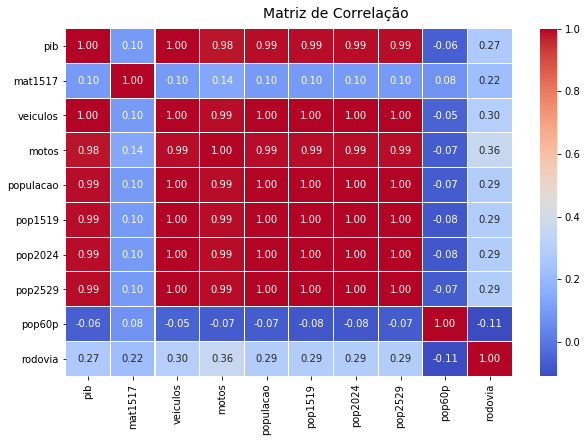

In [747]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df_corr.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Matriz de Correlação', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in greater

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning:

invalid value encountered in less



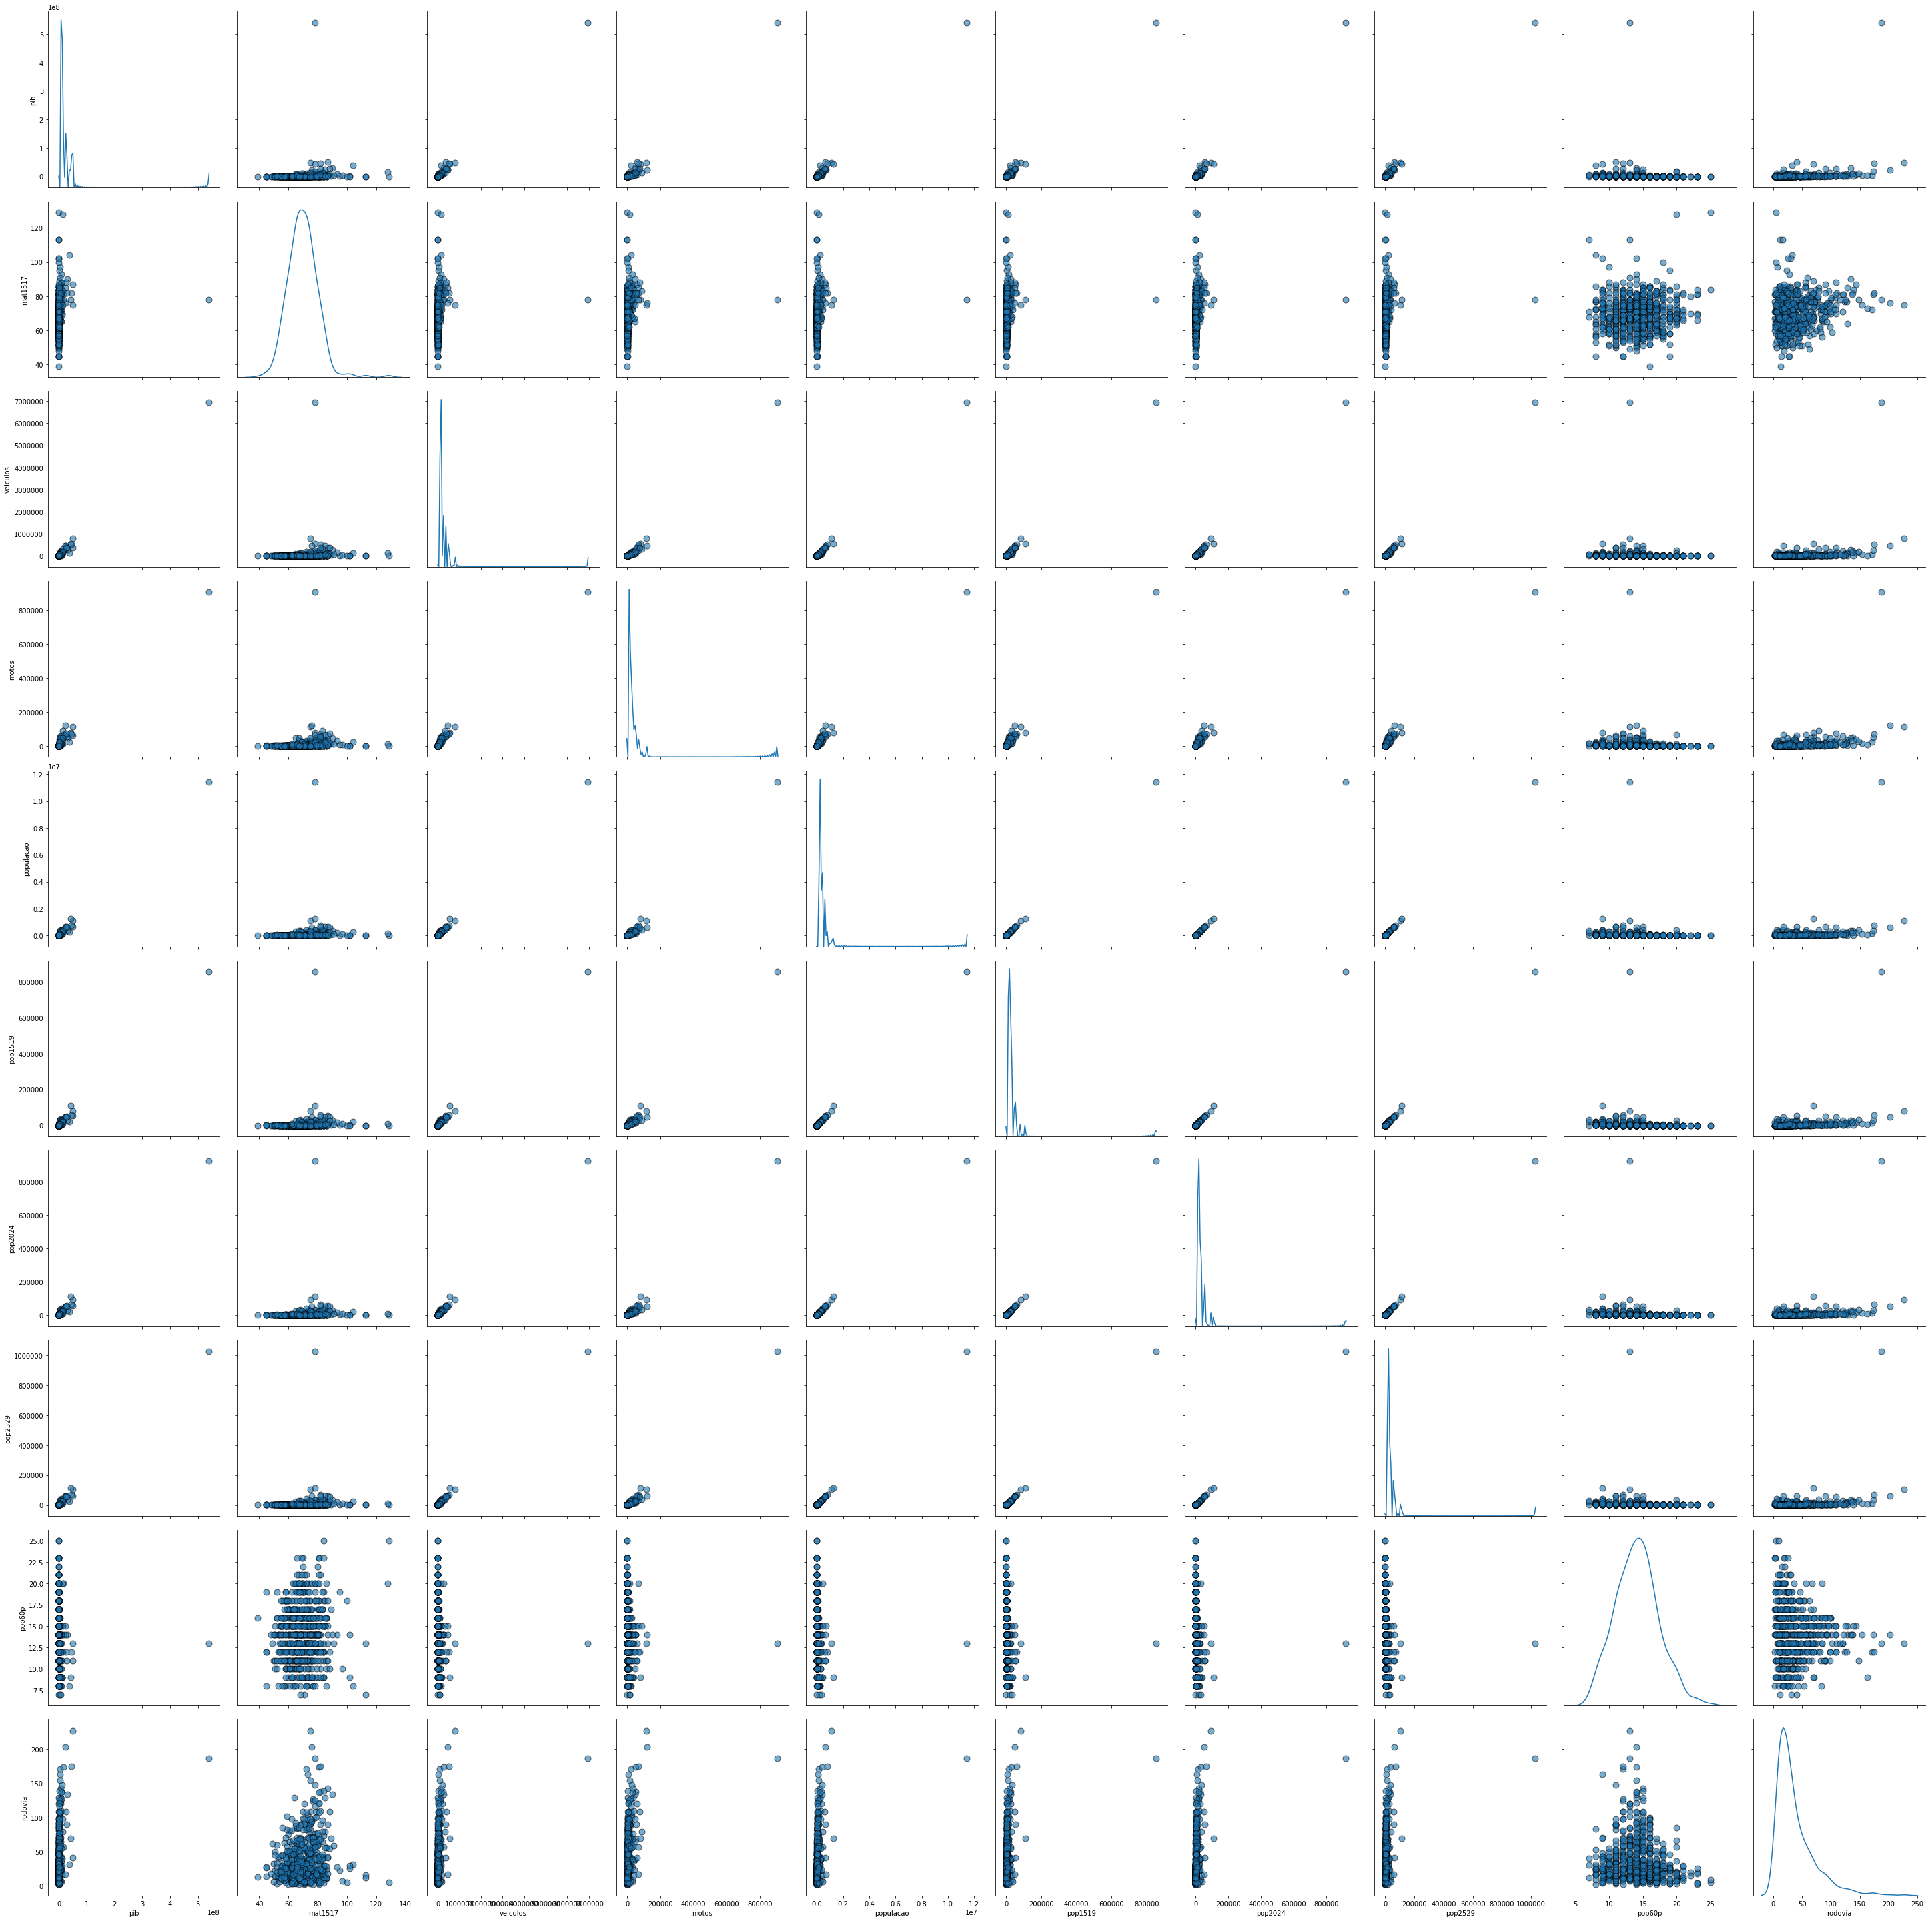

In [748]:
sns.pairplot(df_corr, diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4)

In [749]:
df[['pop1519', 'pop2024','pop2529']].iplot(
    kind='hist',
    histnorm='percent',
    barmode='overlay',
    xTitle='Quantidade',
    yTitle='(%) população',
    title='Distribuição População de 15 a 29 anos')

In [750]:
df[['veiculos', 'motos']].iplot(
    kind='hist',
    histnorm='percent',
    barmode='overlay',
    xTitle='Quantidade',
    yTitle='(%) veiculos e motos',
    title='Distribuição Veiculos e Motos')

In [751]:
df.iplot(
    x='populacao',
    y='pib',
    # Specify the category
    categories='cidade',
    xTitle='População',
    yTitle='Pib',
    title='Populacão x Pib por Cidade')

# Imputação dos dados faltantes

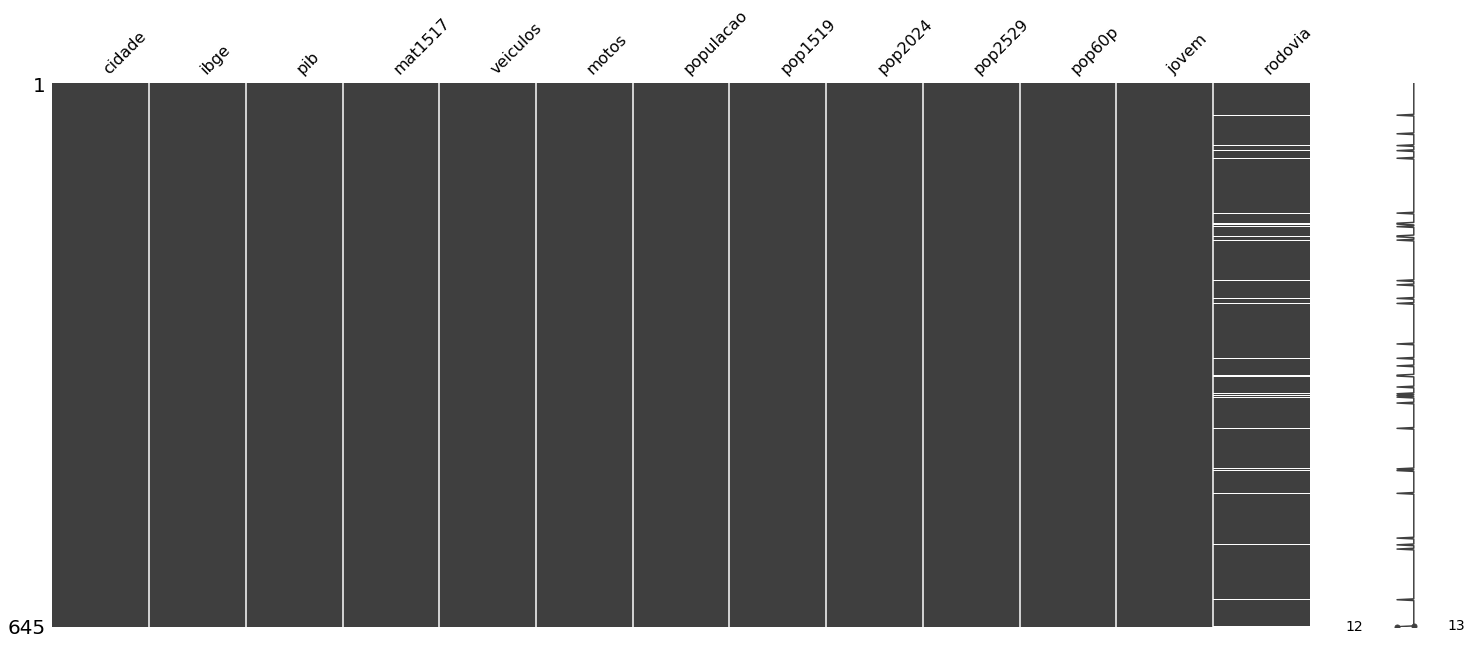

In [752]:
msno.matrix(df)

In [753]:
df.isnull().sum().sort_values(ascending=False)

rodovia      35
jovem         0
pop60p        0
pop2529       0
pop2024       0
pop1519       0
populacao     0
motos         0
veiculos      0
mat1517       0
pib           0
ibge          0
cidade        0
dtype: int64

In [754]:
df.fillna(df.median(), inplace=True)

In [755]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 13 columns):
cidade       645 non-null object
ibge         645 non-null int64
pib          645 non-null int64
mat1517      645 non-null int64
veiculos     645 non-null int64
motos        645 non-null int64
populacao    645 non-null int64
pop1519      645 non-null int64
pop2024      645 non-null int64
pop2529      645 non-null int64
pop60p       645 non-null int64
jovem        645 non-null int64
rodovia      645 non-null float64
dtypes: float64(1), int64(11), object(1)
memory usage: 65.6+ KB


# Analisando Sem 'São Paulo'

In [756]:
df = df[df.cidade != 'São Paulo']

In [757]:
df['rodovia'].iplot(kind= 'hist', bins = 40,  title= 'Distribuição Rodovia - Eliminando Cidade de São Paulo')

In [758]:
df['jovem'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População Jovem')

In [759]:
df['pop60p'].iplot(kind= 'hist', bins = 40,  title= 'Distribuição Porcentagem População acima de 60 anos')

In [760]:
df['motos'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição Motos')

In [761]:
df['veiculos'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição Veiculos')

In [762]:
df['pop1519'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População 15 a 19 anos')

In [763]:
df['pib'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição Pib')

In [764]:
df['populacao'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População')

In [765]:
df['pop1519'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População de 15 a 19 anos')

In [766]:
df['pop2024'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População de 20 a 24 anos')

In [767]:
df['pop2529'].iplot(kind= 'hist', bins = 100,  title= 'Distribuição População de 25 a 29 anos')

In [768]:
df[['pop1519', 'pop2024','pop2529']].iplot(
    kind='hist',
    histnorm='percent',
    barmode='overlay',
    xTitle='Quantidade',
    yTitle='(%) população',
    title='Distribuição População de 15 a 29 anos')

In [769]:
df[['veiculos', 'motos']].iplot(
    kind='hist',
    histnorm='percent',
    barmode='overlay',
    xTitle='Quantidade',
    yTitle='(%) veiculos e motos',
    title='Distribuição Veiculos e Motos')

In [770]:
df.iplot(
    x='populacao',
    y='pib',
    # Specify the category
    categories='cidade',
    xTitle='Populacão',
    yTitle='Pib',
    title='Populacão x Pib por Cidade')

# Avaliando Número de Cluster para Análise de Agrupamento

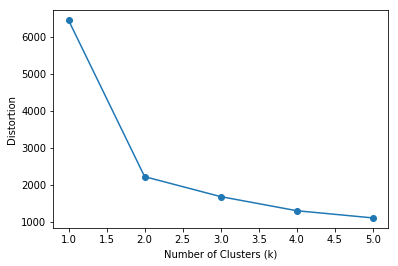

In [771]:
distortions = []
K_to_try = range(1, 6)

for i in K_to_try:
    model = KMeans(
            n_clusters=i,
            init='k-means++',
            n_jobs=-1,
            random_state=1)
    model.fit(df_agrup)
    distortions.append(model.inertia_)
plt.plot(K_to_try, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

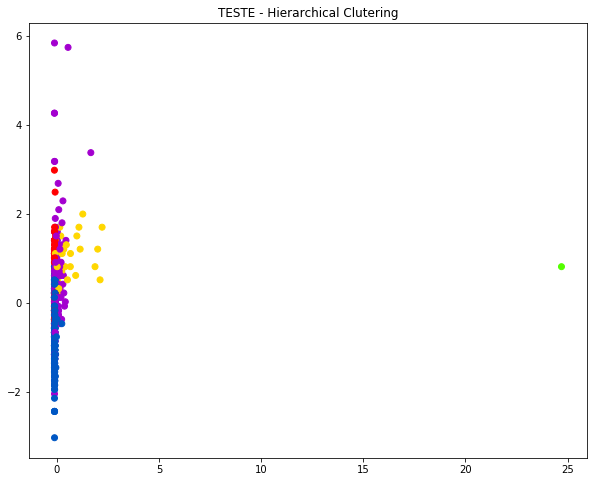

In [773]:
from scipy.cluster.hierarchy import fcluster
k=5
cluster_2 = fcluster(H_cluster, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(df_agrup.iloc[:,0], df_agrup.iloc[:,1],c=cluster_2, cmap='prism')  # plot points with cluster dependent colors
plt.title('TESTE - Hierarchical Clutering')
plt.show()

# Exportando Resultado

In [ ]:
medias.to_csv('medias.csv')